In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc



In [14]:
df = pd.read_csv("heart.csv")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
              'thalassemia', 'target']

In [17]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [18]:
df.info

<bound method DataFrame.info of      age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     63    1                3                     145          233   
1     37    1                2                     130          250   
2     41    0                1                     130          204   
3     56    1                1                     120          236   
4     57    0                0                     120          354   
..   ...  ...              ...                     ...          ...   
298   57    0                0                     140          241   
299   45    1                3                     110          264   
300   68    1                0                     144          193   
301   57    1                0                     130          131   
302   57    0                1                     130          236   

     fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                      1         0                  

In [19]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [20]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


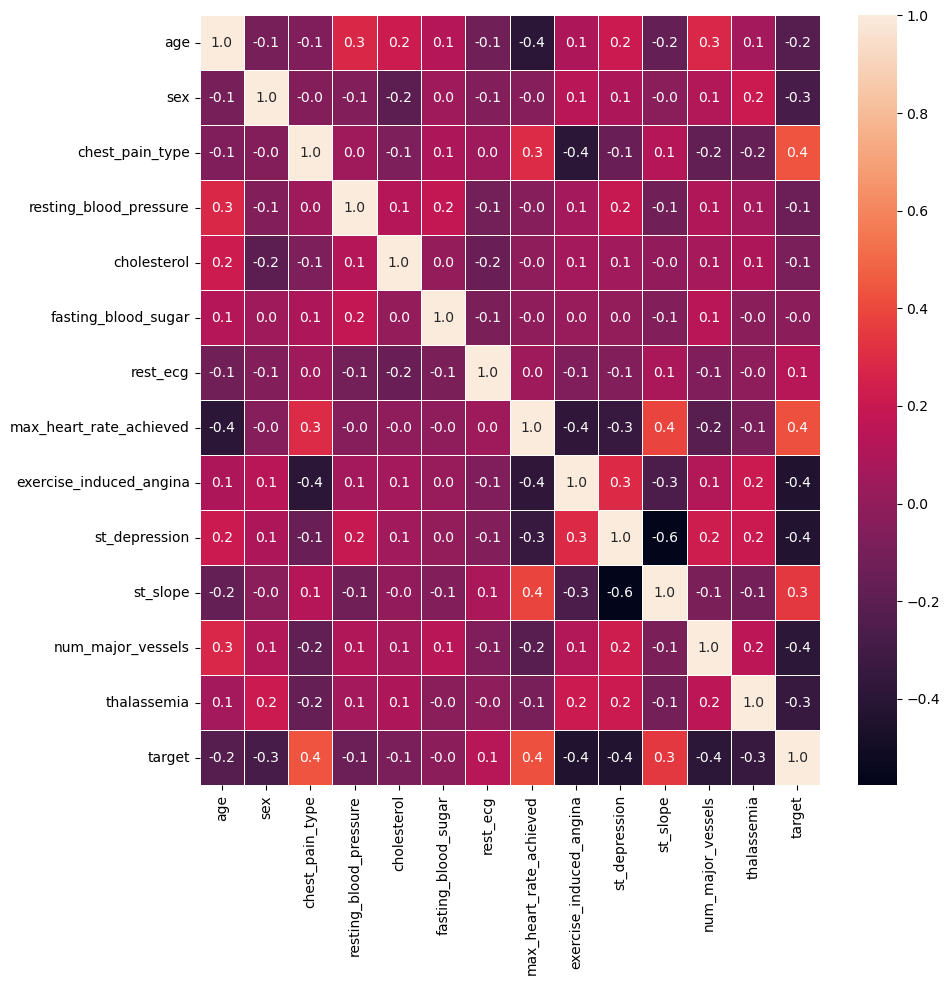

In [21]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

<Axes: ylabel='resting_blood_pressure'>

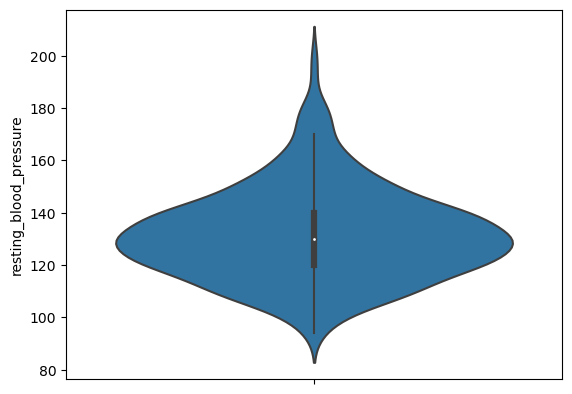

In [22]:
sns.violinplot(y='resting_blood_pressure',data=df)

<Axes: ylabel='cholesterol'>

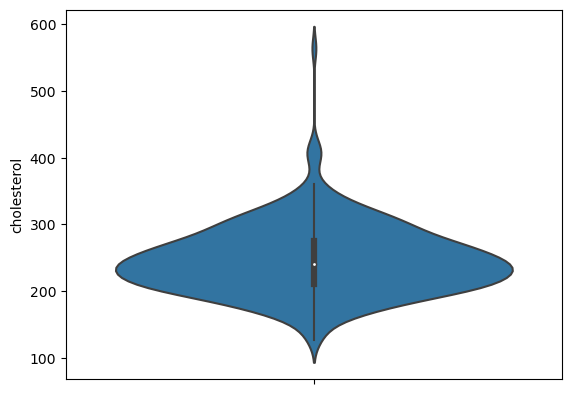

In [14]:
sns.violinplot(y='cholesterol',data=df)

<Axes: ylabel='max_heart_rate_achieved'>

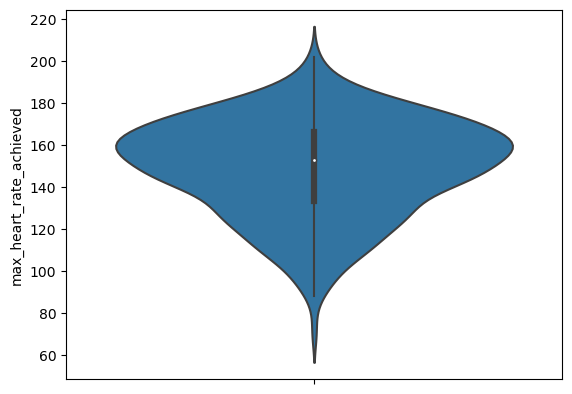

In [23]:
sns.violinplot(y='max_heart_rate_achieved',data=df)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1),
                                                    df['target'], test_size = 0.30, random_state=42) 

C:\Users\Ashik\AppData\Local\Temp\ipykernel_4624\2651624072.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1),


In [25]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [26]:
y_predict = model.predict(X_test)

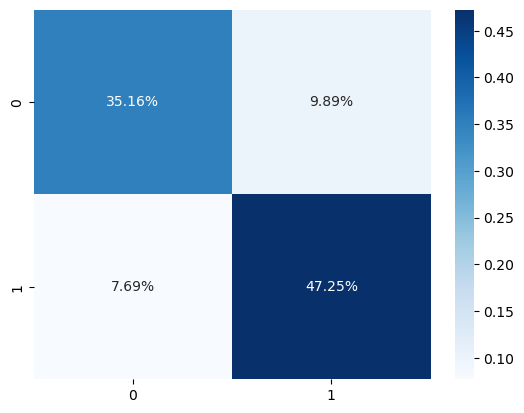

Accuracy is:  82.41758241758241


In [27]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_predict)
print('Accuracy is: ',ac*100)

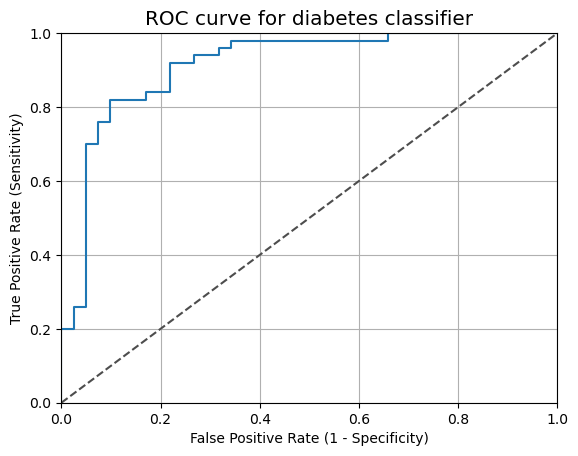

In [28]:
y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [22]:
auc(fpr, tpr)

0.9165853658536586